#### 비지도학습 
- 군집화

#### 정형화 

In [1]:
from sklearn import datasets 
#연습용 datasets 만들어놓음  

In [2]:
iris_dataset = datasets.load_iris()
iris_dataset
#딕셔너리로 되어있음 
#목표변수는 범주형, 길이에 따라 세가지 종류로 분류되어있음 'target'
#4개의 설명변수 'data'

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
type(iris_dataset), iris_dataset.keys()
#Bunch는 object를 싼 클래스
#딕셔너리 성격
#군집을 하는 거니까 우린 target필요없음 

(sklearn.utils._bunch.Bunch,
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']))

In [4]:
features_train = iris_dataset['data']
features_train.shape
#4개의 컬럼을 가졌다는 걸 알 수 있음 

(150, 4)

#### 학습

In [6]:
from sklearn.cluster import KMeans
#모델을 인스턴스화 - 아무것도 없이 하는게 아니라 분류를 몇개로 나눌지도 모델 생성할때 알려줘야함
model = KMeans(n_clusters=2) 

In [28]:
#모델 교육
model.fit(features_train)
#비교대상이 없기 때문에 평가하는게 어려움. 분석가의 판단에 맡겨야함
#묶음을 도와주는 방식의 평가 방법 / 화면상에 그려보는 방법 
#평가라기보다는 최선의 선택을 찾는 방식 

C:\Users\5-21\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\5-21\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

In [10]:
#중앙값 확인 (교육 후 확인 가능)
model.cluster_centers_
#첫번쨰 값의 중앙값, 두번째 값의 중앙값, .... 를 사용해서 중앙값을 만들었음. 
#두 중앙값을 기준으로 군집 만들어 
#최적의 분류 개수 찾아주는 방법 (평가 위한 모델) 

array([[5.00566038, 3.36981132, 1.56037736, 0.29056604],
       [6.30103093, 2.88659794, 4.95876289, 1.69587629]])

#### 알맞은 cluster 갯수 찾기 

In [12]:
#클러스터 돌려서 시각화시켜서 찾음 
cluster_loop_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]
result_list = []

In [13]:
for number in cluster_loop_list : 
    model_n = KMeans(n_clusters=number, n_init=10)
    model_n.fit(features_train)
    result_list.append(model_n.inertia_)
#model_n.inertia_ 각각 분류 갯수별로 중앙값과 중앙값이 얼마나 잘 떨어져있는지 수치화, 분포가 잘 구성되어있는지 확인 가능 

C:\Users\5-21\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\5-21\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\5-21\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\5-21\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows wi

In [14]:
result_list

[152.34795176035792,
 78.85144142614602,
 57.22847321428572,
 46.44618205128205,
 39.03998724608725,
 34.569688528138535,
 30.063110617452722,
 27.908054538520215,
 26.14451931789289]

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt 

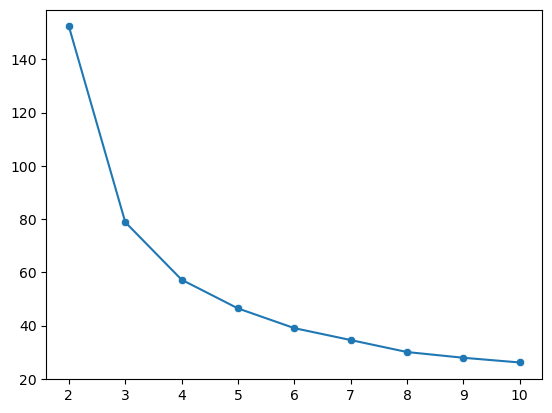

In [18]:
sns.scatterplot(x=cluster_loop_list, y=result_list)
sns.lineplot(x=cluster_loop_list, y=result_list)
plt.show() #같이 찍힘 
#갑자기 꺾이는 곳 두군데 있음--두 군데 중에 하나 선택  3혹은 4
#각 중앙값이 갖는 갯수가 비슷할때, 균등하게 모일때 확 꺽임 
#sum of squared error 
#inertia_ : sum of squared distances of samples to their closest cluster center 
#중앙값과 데이터값 사이의 거리의 제곱을 합한 값 
#처음엔 위치가 잘못되어서 중앙의 기준으로 거리가 멀어서 값이 크다 
#점점 거리가 짧아질것임 (거리가 멀었던것은 다른 중앙값이 넘겨주면서) 그래서 확 꺽인다 -> 그래서 분포가 잘 된 경우라는 것 

#3으로 재모델
remodel = KMeans(n_clusters=3)
remodel.fit(features_train)

In [22]:
remodel.cluster_centers_ #중앙값 확인 

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [23]:
remodel.predict(features_train[20:22])
#[1,1] #중앙값 기준으로 어디에 제일 가깝냐(두번째것) 

array([1, 1])

In [24]:
features_train[20:22]

array([[5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4]])

In [25]:
#잘되었는지 확인하려면 목표변수 활용 
iris_dataset['target'][20:22]
#[1,1] #틀렸음, 재교육 필요

array([0, 0])

#### 평가

In [27]:
#기존- 모든 데이터를 학습
#데이터의 일부분을 테스트를 위해 따로 띄어놓음/ 준비 데이터 방식 
#모델 교육할땐 train만 넣고, 교육 시킨 후 안알려준 데이터로 score 뽑아냄(융통성 있는지) -> score 안좋으면 다시 교육시키거나 데이터 다시 가져와
#분류하는 이유는 모델이 일반적으로 작동하는지 확인(일반화) -> 일반화에 맞지 않으면 해당 model은 불필요해짐 
#평가 후 성능 올리기
#머신이 이해하기 편하게 데이터를 바꿔주는 것(수치 낮추거나 높이거나 평준화시키거나..)특성공학  